# IE6400 Foundations of Data Analytics Engineering
# Fall 2024
### Module 4: Introduction to Machine Learning
### -- STUDENT VERSION --
Meghana Sreenivasa Rao
NUID: 002331855

#### Explain the definition of `Machine Learning` in your own words:
- Machine learning is a method of data analysis that automates analytical model building, allowing systems to learn from data patterns and make decisions without explicit programming.
- It involves training algorithms on large datasets to make predictions or decisions based on input data.


### Linear Regression Model

#### Explain the definition of `Linear Regression Model` in your own words:
- Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.
- It predicts the value of the dependent variable based on the linear combination of the independent variables, aiming to minimize the difference between the predicted and actual values.


#### Exercise 1 Understanding Linear Regression in Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore')


In [3]:
# --- Added the code here ---
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['MedHouseVal'] = california.target
# ---------------------------

In [5]:
print(california_df.head())  
print(california_df.describe())  


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

In [7]:
# --- Added the code here ---
X = california_df.drop('MedHouseVal', axis=1)
y = california_df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ---------------------------

In [9]:
# --- Added the code here ---
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
# ---------------------------

LinearRegression()

In [11]:
# --- Added the code here ---
y_pred = lin_reg.predict(X_test)
# ---------------------------

In [13]:
# --- Added the code here ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# ---------------------------

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 0.56
R^2 Score: 0.58


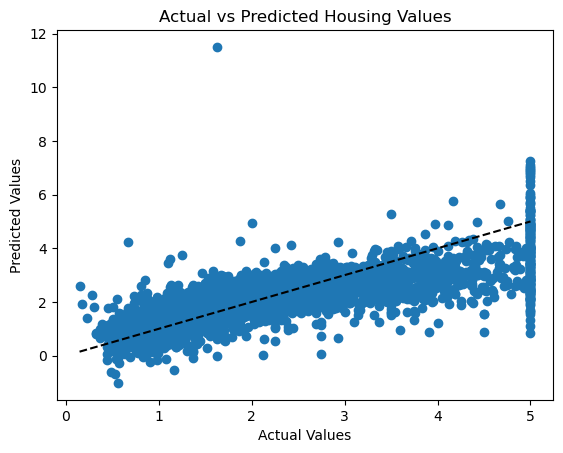

In [15]:
# Plotting the true values vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Housing Values')
plt.show()


#### Write down the explanations and interpretations:
- The scatter plot visualizes the relationship between actual and predicted housing values, with the predicted values plotted against the actual values.
- The dashed line represents the ideal case where the predicted values exactly match the actual values, showing how close the model's predictions are to the real values. The plot indicates a moderate correlation between them.

### Logistic Regression Model



#### Explain the definition of `Logistic Regression Model` in your own words:
- Logistic Regression is a statistical model used for binary classification tasks, where the goal is to predict the probability of a binary outcome (e.g., 0 or 1, True or False).
- It uses a logistic function to model the relationship between the dependent variable and independent variables, ensuring the predicted values lie between 0 and 1.

#### Exercise 2 Logistic Regression Model on the Iris Dataset

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [19]:
iris = load_iris()
X = iris.data
y = iris.target

iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


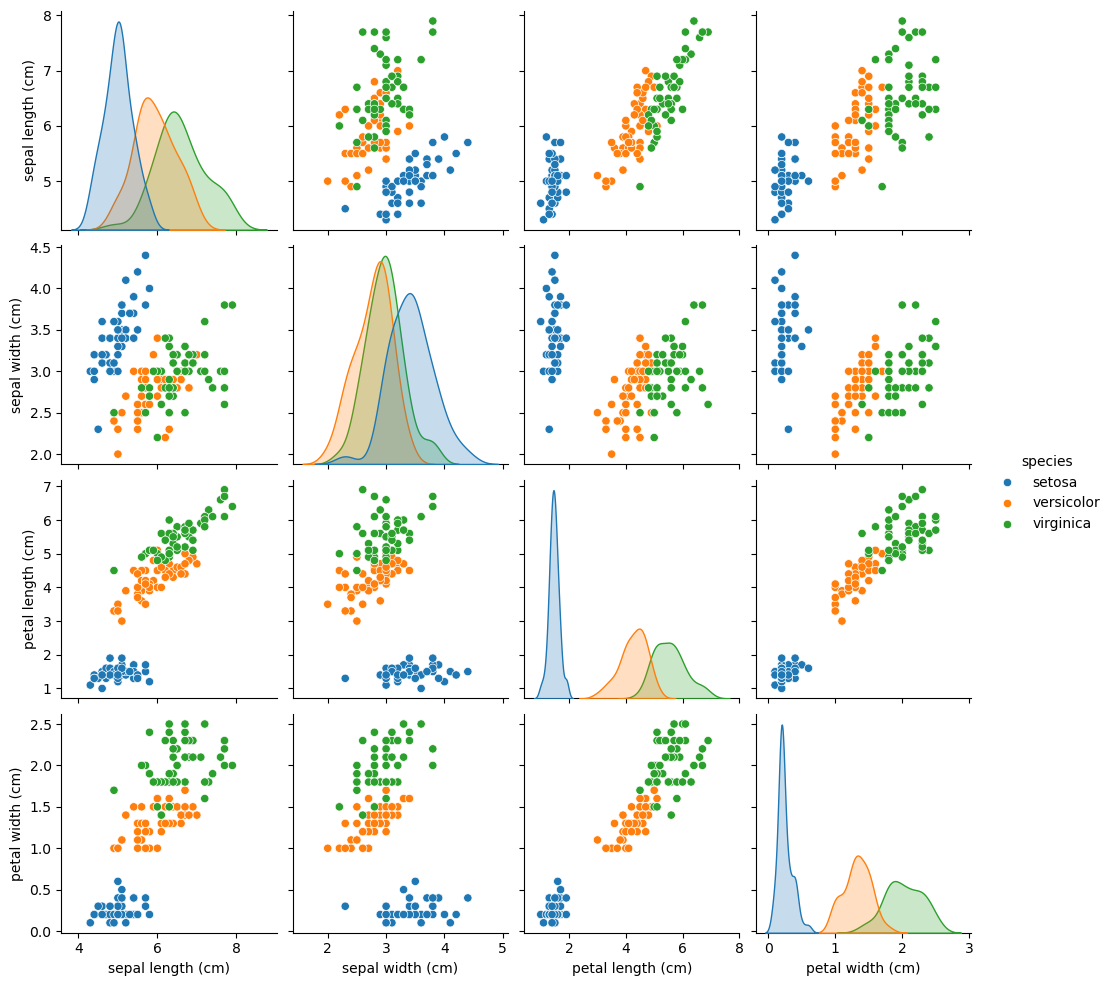

In [21]:
sns.pairplot(iris_df, hue='species')
plt.show()


In [23]:
# --- Added the code here ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# ---------------------------

In [25]:
# --- Added the code here ---
logreg=LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
# ---------------------------

LogisticRegression(max_iter=200)

In [27]:
# --- Added the code here ---
y_pred = logreg.predict(X_test)
# ---------------------------

# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



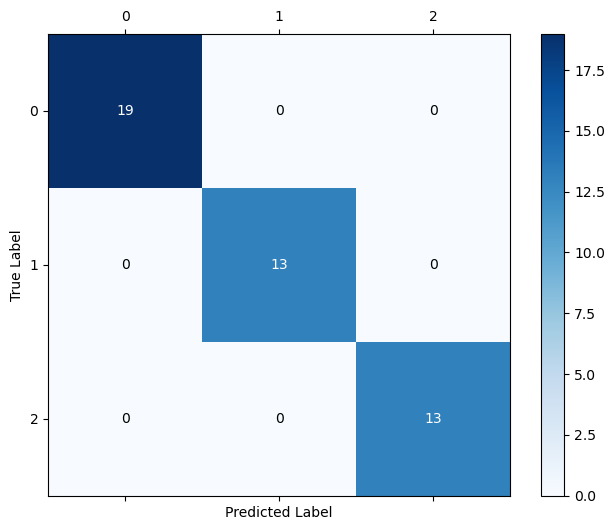

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# --- Added the code here ---
conf_matrix = confusion_matrix(y_test, y_pred)
# ---------------------------

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the size as needed

# --- Added the code here ---
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
# ---------------------------

# Add colorbar for reference
fig.colorbar(cax)

# Add annotations with the confusion matrix values
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{val:d}', ha='center', va='center', color='white' if val > conf_matrix.max()/2 else 'black')

# Set labels for axes
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Adjust the tick labels on x and y axis
ax.set_xticks(np.arange(len(np.unique(y_test))))
ax.set_yticks(np.arange(len(np.unique(y_test))))
ax.set_xticklabels(np.unique(y_test))
ax.set_yticklabels(np.unique(y_test))

# Show the plot
plt.show()


#### Write down the explanations and interpretations:
- The model achieved 100% accuracy, with perfect predictions for all classes (0, 1, 2), as shown by the diagonal values in the confusion matrix.
- Precision, recall, and F1-score are all 1.00 for each class, indicating flawless classification performance without any misclassifications.

### Decision Trees


#### Explain the definition of `Decision Trees` in your own words:
- Decision trees are a type of supervised learning algorithm used for classification and regression tasks.
- They work by splitting the data into subsets based on feature values, creating a tree-like structure where each node represents a decision based on a feature, and the leaves represent the predicted outcome.

#### Exercise 3 Understanding Decision Trees with the Iris Dataset

In [31]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


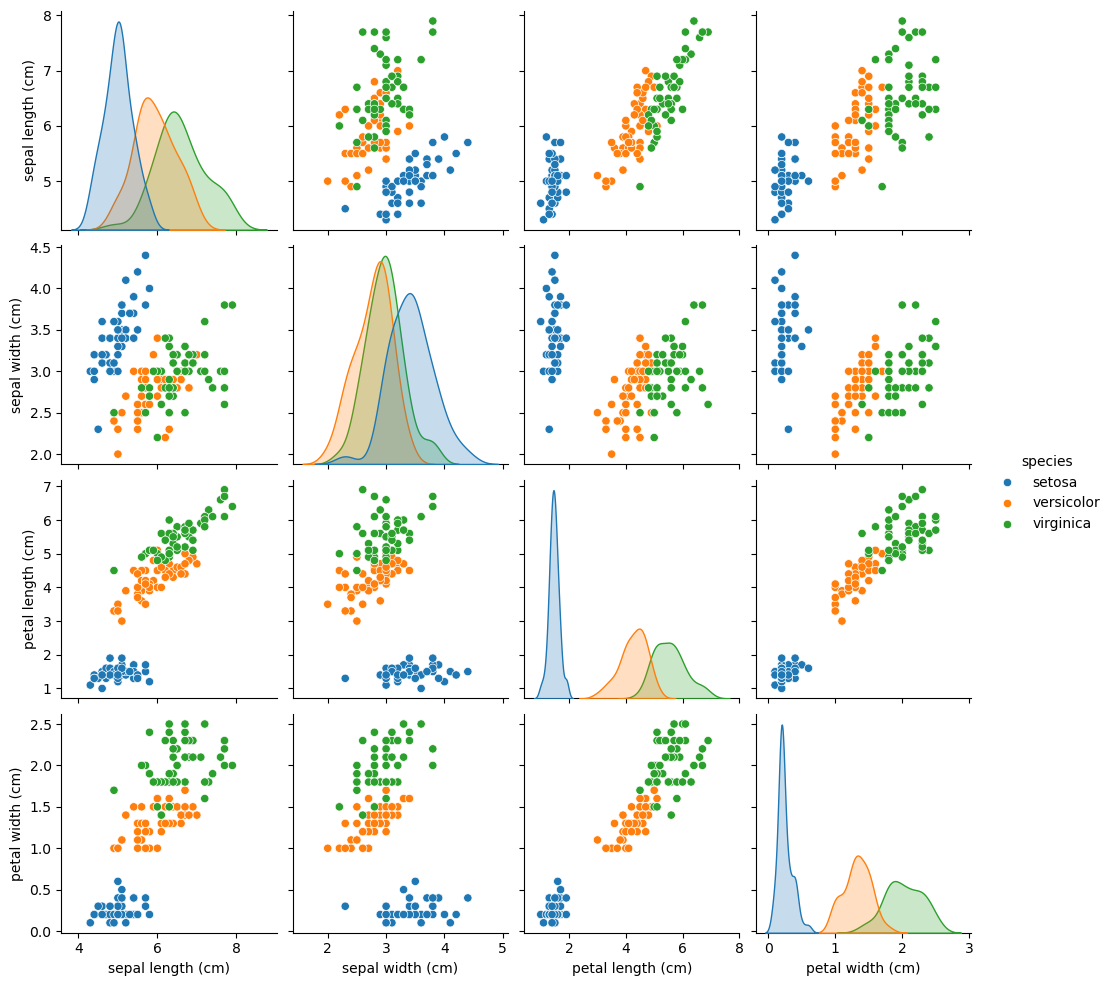

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_iris, hue='species')
plt.show()


In [35]:
from sklearn.model_selection import train_test_split

# --- Added the code here ---
X = df_iris.iloc[:, :-1]
y = df_iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# ---------------------------

In [37]:
from sklearn.tree import DecisionTreeClassifier

# --- Added the code here ---
dt_classifier=DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
# ---------------------------

DecisionTreeClassifier(random_state=42)

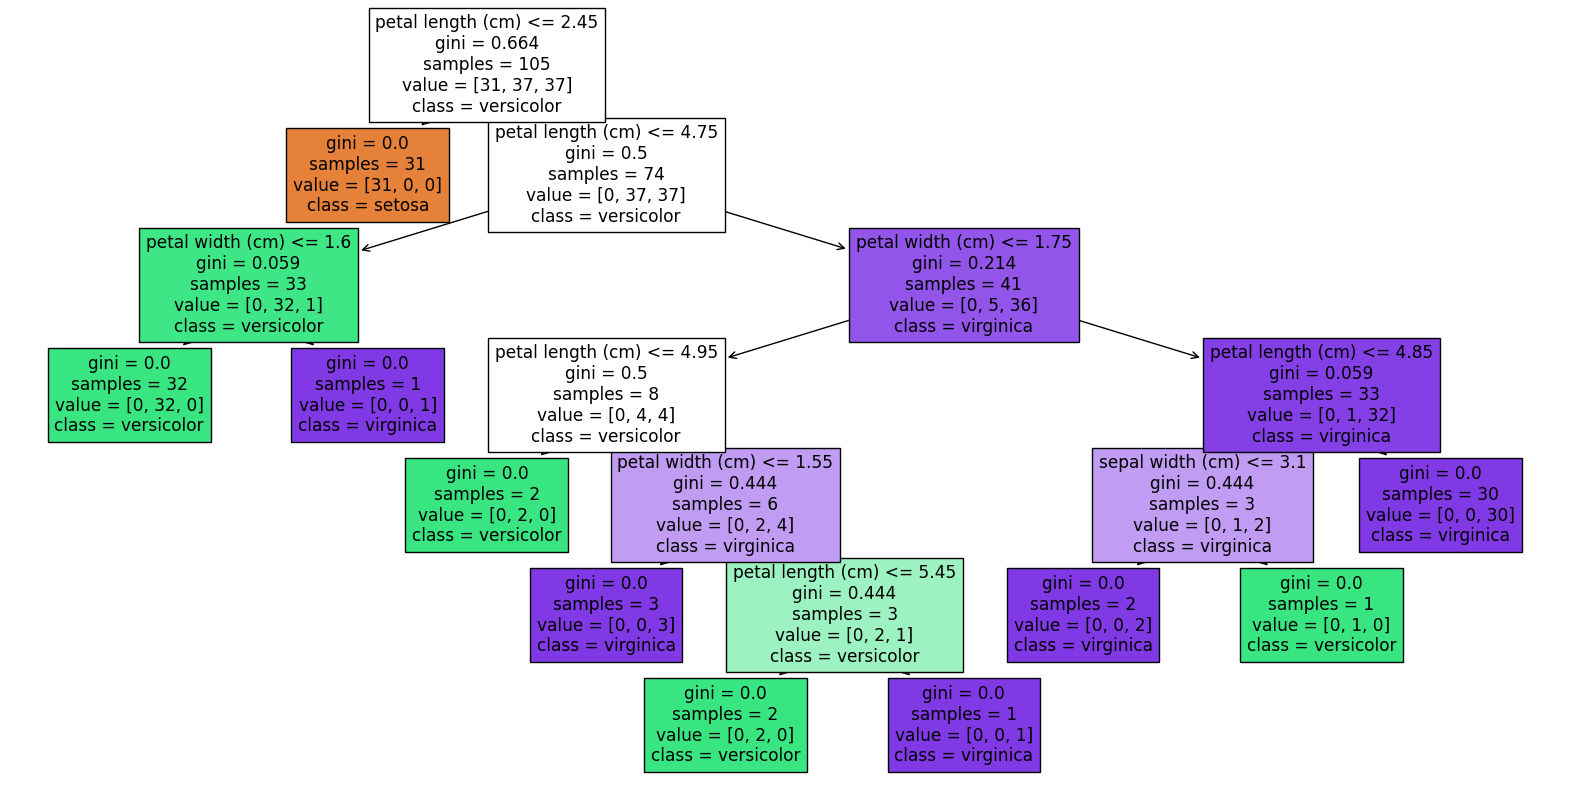

In [39]:
from sklearn.tree import plot_tree

class_names_list = iris.target_names.tolist()
plt.figure(figsize=(20,10))

# --- Added the code here ---
plot_tree(dt_classifier, feature_names=iris.feature_names, class_names=class_names_list, filled=True)
# ---------------------------

plt.show()



In [41]:
from sklearn.metrics import classification_report

# --- Added the code here ---
y_pred = dt_classifier.predict(X_test)
# ---------------------------

# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### Write down the explanations and interpretations:
- The model achieved 100% precision, recall, and F1-score for all classes, indicating perfect classification with no false positives or false negatives.
- The decision tree visualization shows how features like petal length and width are used to split the data at each node, leading to accurate classifications for Setosa, Versicolor, and Virginica.

### Random Forest Model in Machine Learning


#### Explain the definition of `Random Forest Model` in your own words:
- A Random Forest Model is an ensemble learning technique that combines multiple decision trees to improve classification accuracy. It builds several decision trees using random subsets of the data and features, then aggregates their results to make a final prediction.
- Each tree in the forest is trained independently, and the model typically predicts by taking a majority vote (for classification) or averaging (for regression) the outputs of all the individual trees.

#### Exercise 4 Predicting Wine Quality with Random Forest

In [43]:
import pandas as pd

# Load the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
df_wine = pd.read_csv(url, sep=';')
df_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


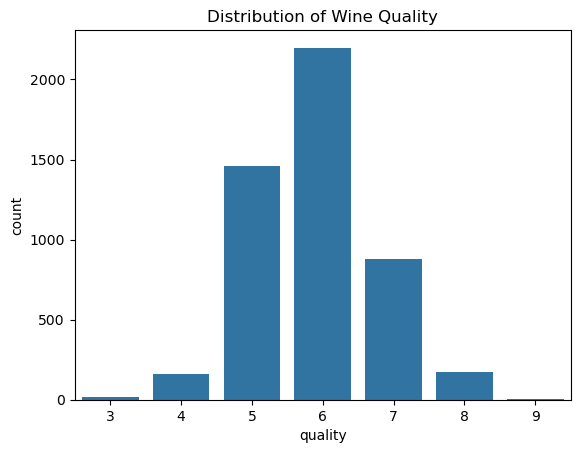

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of wine quality ratings
sns.countplot(x='quality', data=df_wine)
plt.title('Distribution of Wine Quality')
plt.show()

#### Write down the explanations and interpretations:
- The wine quality distribution shows that most of the wines have a quality score of 5 or 6, as these categories have the highest number of wine samples.
- The quality ratings are spread across several values, with fewer wines rated 3, 4, and 7, while very few wines are rated 8 or higher. This suggests a concentration around average wine qualities.

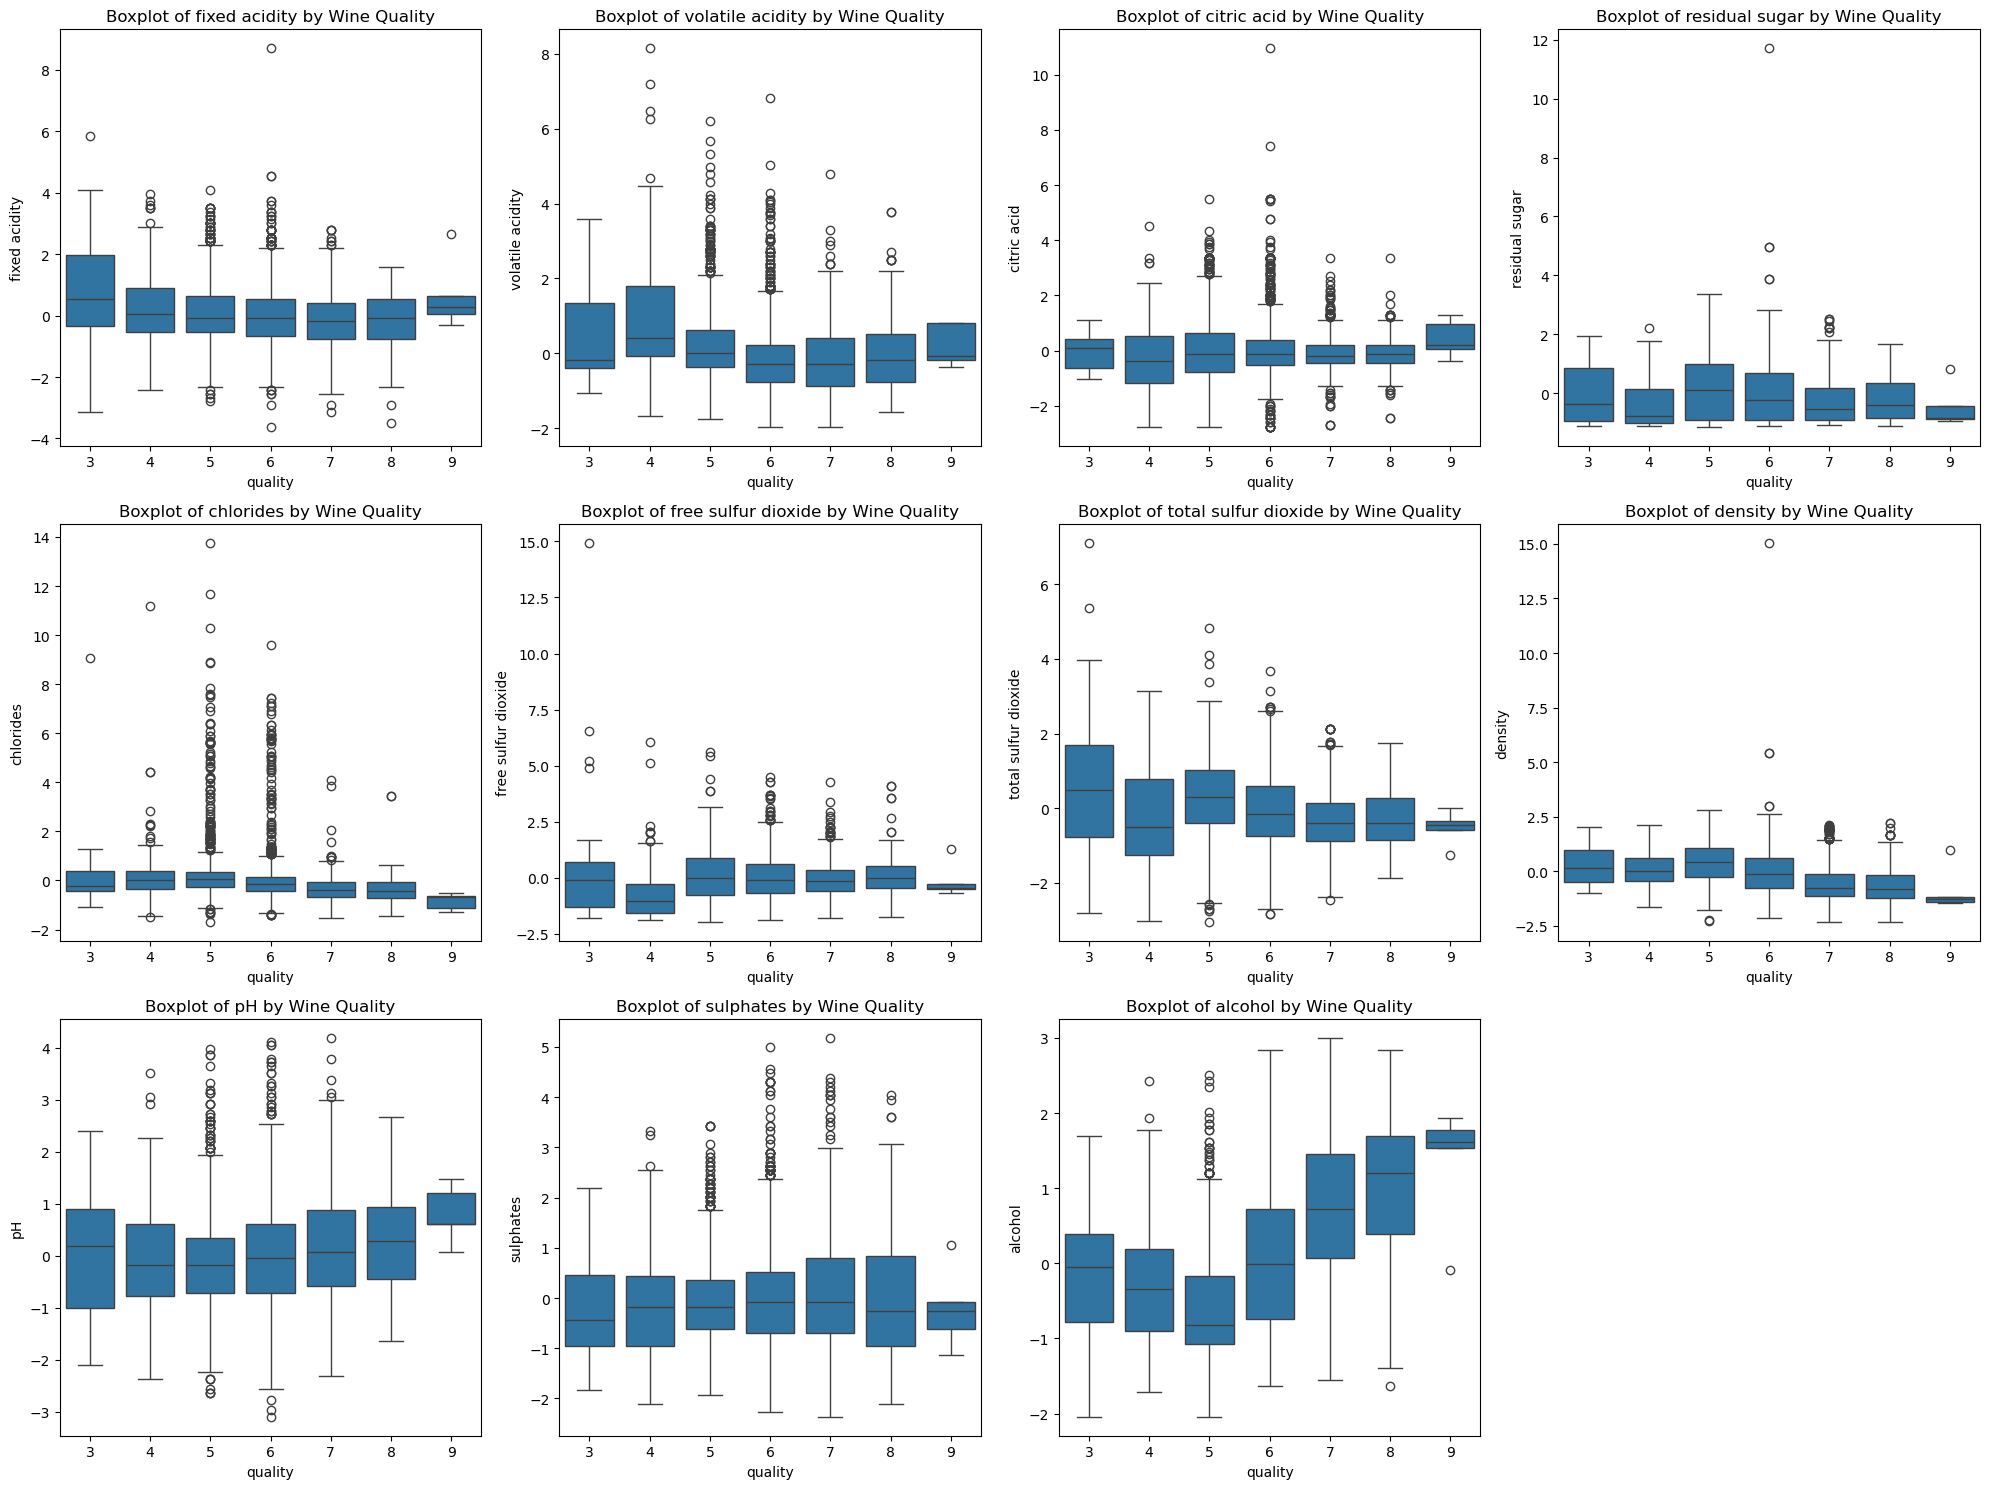

In [47]:
# Create box plots for each feature by wine quality
features = df_wine.columns[:-1]  # Exclude the 'quality' column
df_wine[features] = df_wine[features].apply(lambda x: (x - x.mean()) / x.std())  # Normalize the features

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x='quality', y=feature, data=df_wine)
    plt.title(f'Boxplot of {feature} by Wine Quality')

plt.tight_layout()
plt.show()

#### Write down the explanations and interpretations:
- The box plots reveal that features such as fixed acidity, citric acid, residual sugar, and sulphates have a wider distribution across different wine qualities, suggesting variability within those attributes for different quality ratings.
- For features like chlorides, free sulfur dioxide, and alcohol, the box plots show relatively narrower distributions, indicating that these features tend to be more consistent across different wine quality ratings

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Added the code here ---
X = df_wine.drop('quality', axis=1)
y = df_wine['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# ---------------------------

In [51]:
from sklearn.ensemble import RandomForestClassifier

# --- Added the code here ---
rt_classifier=RandomForestClassifier(random_state=42)
rt_classifier.fit(X_train, y_train)
# ---------------------------

RandomForestClassifier(random_state=42)

In [53]:
from sklearn.metrics import classification_report

# --- Added the code here ---
y_pred = rt_classifier.predict(X_test)
# ---------------------------

# Generate a classification report
print(classification_report(y_test, y_pred, zero_division=0))



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.44      0.10      0.16        40
           5       0.68      0.71      0.69       426
           6       0.66      0.78      0.71       668
           7       0.77      0.54      0.64       280
           8       0.78      0.37      0.50        49

    accuracy                           0.68      1470
   macro avg       0.55      0.42      0.45      1470
weighted avg       0.68      0.68      0.67      1470



#### Write down the explanations and interpretations:
- The model has a relatively high accuracy of 0.68, but the performance varies significantly across different classes, especially with poor precision and recall for classes 3 and 8.
- Class 6, representing the most frequent quality, has the best performance with high recall (0.78) and a decent f1-score (0.71), whereas the model struggles with lower-quality wines (3, 4, and 8), showing very low precision and recall.

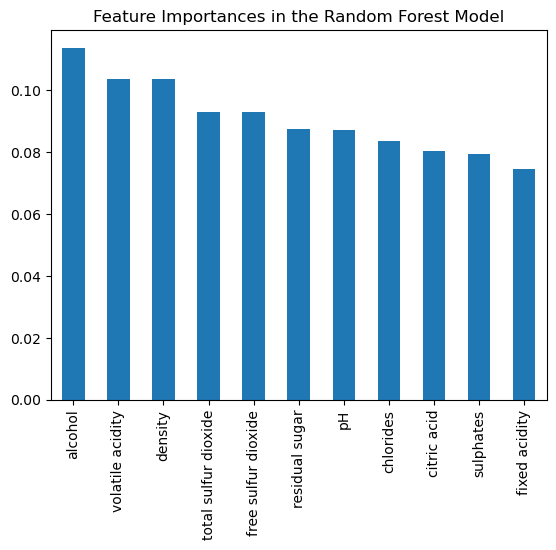

In [57]:
import numpy as np

# --- Added the code here ---
feature_importances = rt_classifier.feature_importances_
# ---------------------------

# Convert the feature importances to a pandas series
features = pd.Series(feature_importances, index=df_wine.columns[:-1])

# Plot the importances
features.sort_values(ascending=False).plot(kind='bar', title='Feature Importances in the Random Forest Model')
plt.show()


#### Write down the explanations and interpretations:
- The bar plot displays the relative importance of each feature in predicting wine quality, with the most significant features contributing more to the model's decisions.
- Features with higher importance (such as alcohol and density) will have a greater impact on the model’s predictions, while features with lower importance have a minimal effect.

### Support Vector Machine (SVM) Model in Machine Learning


#### Explain the definition of `Support Vector Machine (SVM)` in your own words:
- A Support Vector Machine (SVM) is a supervised machine learning model used for classification and regression tasks. It works by finding the optimal hyperplane that separates data points from different classes with the maximum margin.
- The main idea behind SVM is to identify the decision boundary that best divides data into classes, where the data points closest to the boundary (support vectors) are most important in determining the boundary’s position.


#### Exercise 5 Handwritten Digit Recognition with Support Vector Machine (SVM)

#### Problem Statement

As a machine learning engineer at a tech company, you’re working on developing OCR software to digitize handwritten documents. Your task is to build a machine-learning model to accurately recognize handwritten digits (0 through 9) from images. To achieve this, you decide to use a Support Vector Machine (SVM) because of its effectiveness in handling high-dimensional data and its ability to perform non-linear classification through kernel tricks.



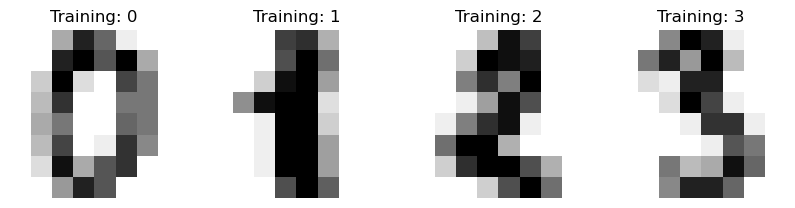

In [59]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the dataset
digits = datasets.load_digits()

# Visualize the first 4 images
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
plt.show()


In [61]:
from sklearn.model_selection import train_test_split

# --- Added the code here ---
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=0
)
# ---------------------------

In [63]:
from sklearn import svm

# --- Added the code here ---
svm_classifier=svm.SVC(gamma=0.001)
svm_classifier.fit(X_train, y_train)
# ---------------------------

SVC(gamma=0.001)

In [65]:
from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

# --- Added the code here ---
clf=GridSearchCV(svm.SVC(), param_grid, cv=5)
clf.fit(X_train, y_train)
# ---------------------------

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [67]:
from sklearn.metrics import classification_report

# --- Added the code here ---
y_pred = clf.predict(X_test)
# ---------------------------

# Generate a classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       1.00      0.98      0.99        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



<Figure size 1000x1000 with 0 Axes>

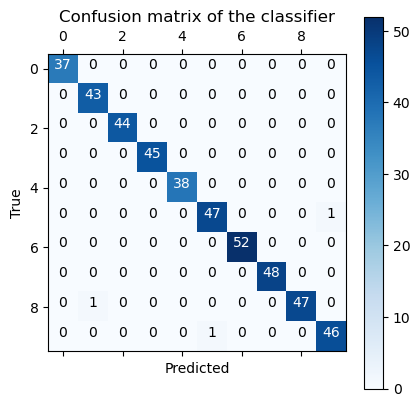

In [69]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# --- Added the code here ---
cm = confusion_matrix(y_test, y_pred)
# ---------------------------

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))  # Adjust the size as needed

# Use matshow to display the confusion matrix
plt.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')

# Adding the text labels
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Show the plot
plt.show()


#### Write down the explanations and interpretations:
- The model shows excellent performance, with a high accuracy of 99% on the digits dataset, and the precision, recall, and F1-score are near 1 for all digits, indicating that the classifier is highly reliable in correctly identifying the digits.
- The confusion matrix visually confirms the model's accuracy, with most values on the diagonal, indicating that the classifier is making correct predictions for nearly all test samples, with few misclassifications.

### Neural Network Model in Machine Learning


#### Explain the definition of `Neural Network Model` in your own words:
- A Neural Network Model is a machine learning approach inspired by the brain, consisting of layers of interconnected nodes (neurons) that process and transmit information.
- It learns patterns from data by adjusting connection weights through training, enabling it to perform tasks like classification, regression, and pattern recognition.


#### Exercise 6 Predicting Housing Prices with Neural Networks

#### Problem Statement 
As a data scientist for a real estate company, your task is to predict median house values in California districts using a neural network model. We'll use the California Housing dataset from `sklearn` to build this model, leveraging the power of neural networks to capture complex relationships between features like the number of rooms, population, and median income to predict housing prices accurately.


In [71]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load California Housing data
housing = fetch_california_housing()

# Perform preprocessing: Scale the features
scaler = StandardScaler()
housing.data = scaler.fit_transform(housing.data)

In [73]:
from sklearn.model_selection import train_test_split

# --- Added the code here ---
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)
# ---------------------------

In [77]:
from sklearn.neural_network import MLPRegressor

# --- Added the code here ---
nn_regressor = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
nn_regressor.fit(X_train, y_train)
# ---------------------------

MLPRegressor(max_iter=500, random_state=42)

In [81]:
from sklearn.metrics import mean_squared_error
import numpy as np

# --- Added the code here ---
y_pred = nn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# ---------------------------

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 0.2993013569932045
Root Mean Squared Error: 0.5470844148695926


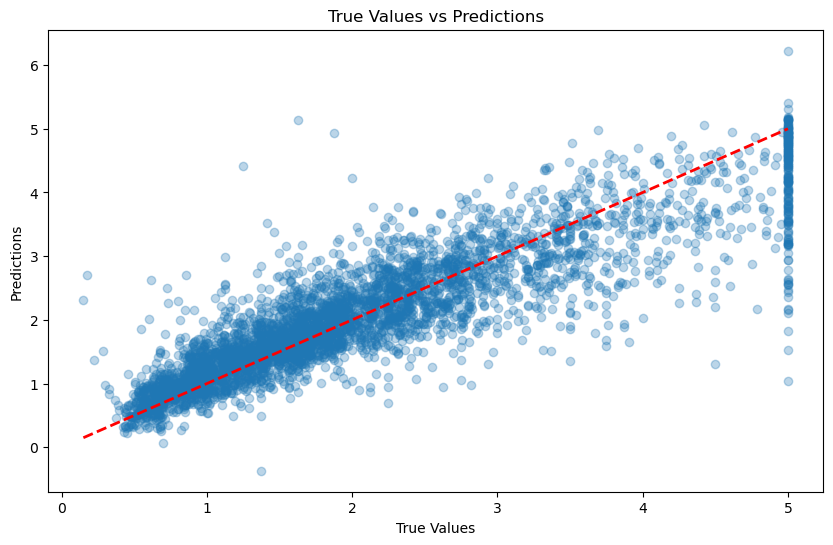

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()


#### Write down the explanations and interpretations:
- The model has a relatively low error, with a Mean Squared Error of 0.30 and a Root Mean Squared Error of 0.55, indicating that the neural network regressor is making reasonably accurate predictions.
- The scatter plot shows a close alignment between true values and predictions, with most points clustered around the red dashed line, suggesting a good fit and minimal prediction bias.

### Naive Bayes Model in Machine Learning



#### Explain the definition of `Naive Bayes Model` in your own words:
- Naive Bayes is a classification model based on applying Bayes' Theorem with strong (naive) independence assumptions between the features.
- It calculates the probability of a class given the features by multiplying the individual probabilities of each feature, assuming they are independent, and selecting the class with the highest probability.


#### Exercise 7 Iris Species Classification with Naive Bayes

#### Problem Statement and Introduction

As a botanist, you're looking to automate the categorization of iris plants into one of three species based on petal and sepal sizes. We'll use the Naive Bayes classifier, a simple yet effective probabilistic model for this task. In this exercise, we’ll utilize the `iris` dataset from `sklearn` to build a model that can accurately identify the species of an iris plant based on its features.


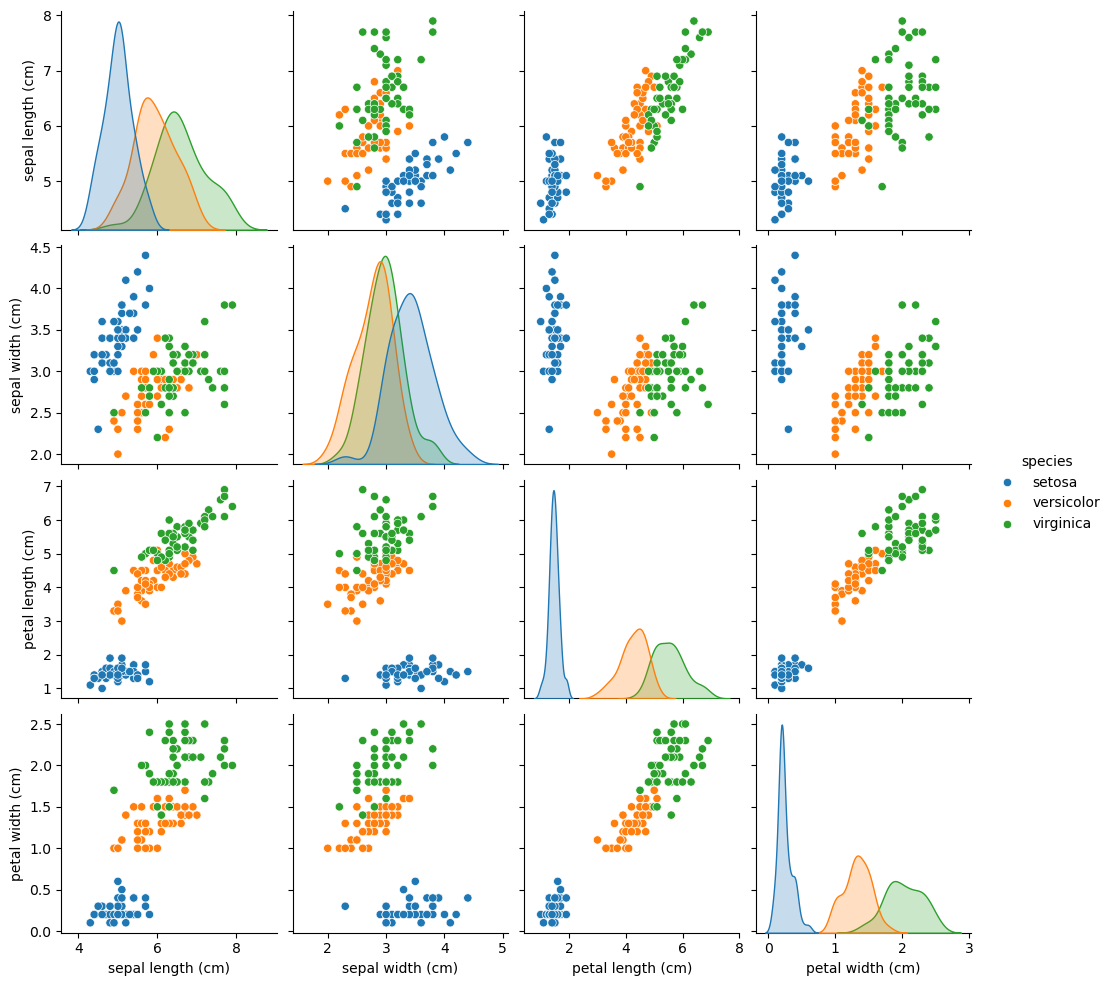

In [85]:
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd

# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Pairplot to visualize the relationships between features
sns.pairplot(iris_df, hue='species')


In [87]:
from sklearn.model_selection import train_test_split

# --- Added the code here ---
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)
# ---------------------------

In [89]:
from sklearn.naive_bayes import GaussianNB

# --- Added the code here ---
gnb=GaussianNB()
gnb.fit(X_train, y_train)
# ---------------------------

GaussianNB()

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

# --- Added the code here ---
y_pred = gnb.predict(X_test)
# ---------------------------

# Generate a classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



<Figure size 800x600 with 0 Axes>

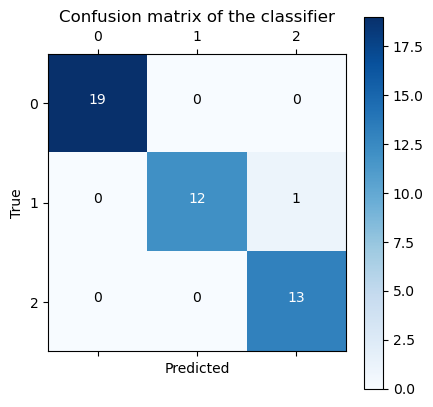

In [93]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))  # Adjust the size as needed

# Use matshow to display the confusion matrix
plt.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')

# Adding the text labels
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Adjust layout to avoid cutting off edges without using tight_layout
plt.subplots_adjust(left=0.2, right=0.8, top=0.85, bottom=0.15)

# Show the plot
plt.show()


#### Write down the explanations and interpretations:
- The model shows high performance with an accuracy of 98%, achieving perfect precision and recall for 'setosa' and near-perfect results for the other classes, indicating reliable classification across all three iris species.
- The confusion matrix visualizes that misclassifications are minimal, especially between 'versicolor' and 'virginica', as indicated by the lower number of off-diagonal elements, demonstrating that the classifier is highly accurate in distinguishing between the species.

### Principal Component Analysis (PCA)


#### Explain the definition of `Principal Component Analysis (PCA)` in your own words:
- PCA is a technique used to reduce the dimensionality of data by transforming it into a set of new variables, called principal components, which capture the maximum variance in the data.
- It helps in simplifying complex datasets by identifying the most important features (directions of greatest variance), allowing for easier visualization and analysis without losing significant information.


#### Exercise 8 Dimensionality Reduction with PCA on Wine Dataset

#### Explain the definition of `Dimensionality Reduction ` in your own words:
- Dimensionality reduction is the process of reducing the number of input variables or features in a dataset while retaining as much relevant information as possible.
- It simplifies complex datasets, making them easier to analyze and visualize, and helps to improve the performance of machine learning models by removing redundant or irrelevant features.

In [95]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the wine dataset
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

# Standardize the features
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)


In [97]:
from sklearn.decomposition import PCA

# --- Added the code here ---
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)
# ---------------------------

# Create a DataFrame with the PCA results
wine_pca_df = pd.DataFrame(data=wine_pca, columns=['Principal Component 1', 'Principal Component 2'])
wine_pca_df['target'] = wine.target


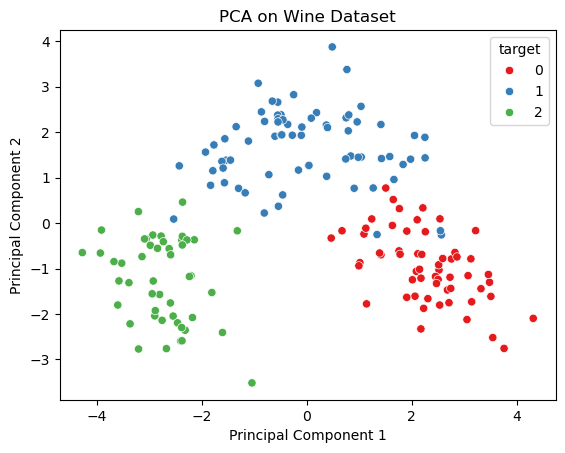

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the PCA-transformed version of the wine dataset
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='target', data=wine_pca_df, palette='Set1')
plt.title('PCA on Wine Dataset')
plt.show()


#### Write down the explanations and interpretations:
- The PCA transformed the wine dataset into two principal components, accounting for the majority of the variance in the data. The first component captures the most variation, while the second component explains the remaining significant variation.
- The scatter plot reveals a strong separation between different wine classes (target variable) along the two components, with each class grouping distinctly, indicating the effectiveness of PCA in highlighting class-specific patterns in reduced dimensions.

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the original and PCA-reduced datasets into training and test sets
X_train_orig, X_test_orig, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(wine_pca, wine.target, test_size=0.3, random_state=42)

# --- Added the code here ---
rf_orig = RandomForestClassifier(random_state=42)
rf_orig.fit(X_train_orig, y_train)
y_pred_orig = rf_orig.predict(X_test_orig)

rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)
# ---------------------------

# Compare accuracy
accuracy_orig = accuracy_score(y_test, y_pred_orig)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f'Accuracy with original features: {accuracy_orig:.2f}')
print(f'Accuracy with PCA features: {accuracy_pca:.2f}')


Accuracy with original features: 1.00
Accuracy with PCA features: 0.98


#### Write down the explanations and interpretations:
- The Random Forest model achieved perfect accuracy (1.00) on the original features, indicating that the full feature set contains all the necessary information for classification.
- After dimensionality reduction with PCA, the accuracy slightly decreased to 0.98, suggesting that while PCA preserved most of the important information, some minor details were lost, impacting the model's performance slightly.

### Gradient Boosting Machines (GBM)


#### Explain the definition of `Gradient Boosting Machines (GBM)` in your own words:
- Gradient Boosting Machines (GBM) is a machine learning technique that builds an ensemble of decision trees in a sequential manner, where each tree corrects the errors of the previous ones by focusing on the data points that were misclassified.
- It uses a gradient descent approach to minimize the loss function, combining the predictions from all trees to produce a final, more accurate prediction.


#### Exercise 9 Predicting the diabete using GBM Model

#### Problem Statement
The Pima Indians Diabetes Database contains medical data on female patients of Pima Indian heritage aged 21 and older. We aim to use this data to predict the likelihood of diabetes onset based on various diagnostic measurements. We'll build a Gradient Boosting Machine (GBM) model to make these predictions, aiming for high accuracy in identifying patients with diabetes.



In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [105]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Display the first 5 rows of the dataset
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [119]:
# Split the data into features and target
X = data.iloc[:, :-1]
y = data['Outcome']

# --- Added the code here ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ---------------------------

In [121]:
# --- Added the code here ---
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
# ---------------------------

In [123]:
# --- Added the code here ---
accuracy = accuracy_score(y_test, y_pred)
# ---------------------------

print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        99
           1       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



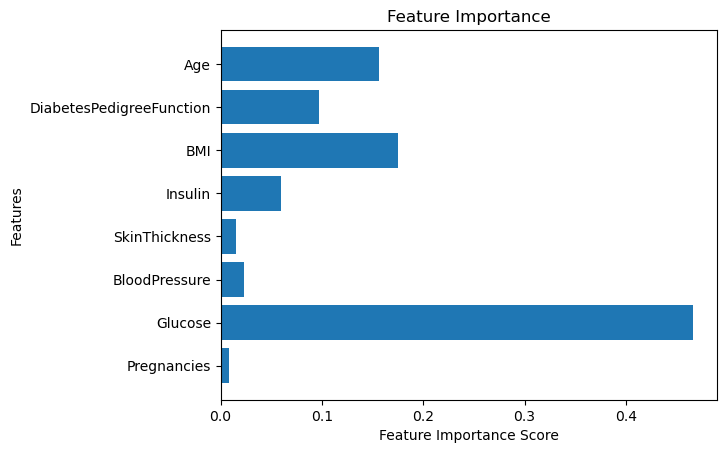

In [125]:
# --- Added the code here ---
feature_importance = gbm.feature_importances_
# ---------------------------

# Plot feature importance
plt.barh(columns[:-1], feature_importance)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


#### Write down the explanations and interpretations:
- The Gradient Boosting Classifier (GBM) achieved an accuracy of 0.73, showing good performance overall, with higher precision and recall for the negative class (0) compared to the positive class (1), indicating better prediction of non-diabetic cases.
- The feature importance plot reveals that the "Glucose" and "BMI" features have the most significant impact on predicting diabetes.

### Convolutional Neural Network (CNN)


#### Explain the definition of `Convolutional Neural Network (CNN)` in your own words:
- A Convolutional Neural Network (CNN) is a deep learning model designed to process and analyze visual data, like images.
- It uses layers like convolutional, pooling, and fully connected layers to automatically detect features and make predictions from images.


#### Exercise 10 Understanding CNNs with PyTorch on Fashion-MNIST

#### Problem Statement

In this exercise, we'll dive into Convolutional Neural Networks (CNNs) using the PyTorch library to tackle the Fashion-MNIST dataset, consisting of grayscale images of various fashion items categorized into ten classes like T-shirts, trousers, and sneakers. Each image is 28x28 pixels, presenting a more challenging classification task than the standard MNIST digit dataset. We aim to build a CNN that can effectively classify these images into their correct fashion categories.


In [127]:
#!conda install -c pytorch pytorch
!pip install torch


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified



   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/203.0 MB 737.3 kB/s eta 0:04:36
   ---------------------------------------- 0.2/203.0 MB 737.3 kB/s eta 0:04:36
   ---------------------------------------- 0.3/203.0 MB 749.3 kB/s eta 0:04:31
   ---------------------------------------- 0.3/203.0 MB 749.3 kB/s eta 0:04:31
   ---------------------------------------- 0.3/203.0 MB 752.2 kB/s eta 0:04:30
   ---------------------------------------- 0.4/203.0 MB 846.3 kB/s eta 0:04:00
   ---------------------------------------- 0.5/203.0 MB 894.8 kB/s eta 0:03:47
   -----------

In [129]:
#!conda install -c pytorch torchvision
!pip install torchvision


   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.6 MB 245.8 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.6 MB 297.7 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.6 MB 374.1 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.6 MB 385.0 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.6 MB 448.2 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.6 MB 448.2 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.6 MB 403.5 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.6 MB 420.8 kB/s eta 0:00:04
   ----- ---------------------------------- 0.2/1.6 MB 401.2 kB/s eta 0:00:04
   ----- -------------

100%|██████████| 26.4M/26.4M [00:04<00:00, 5.59MB/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 226kB/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.53MB/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



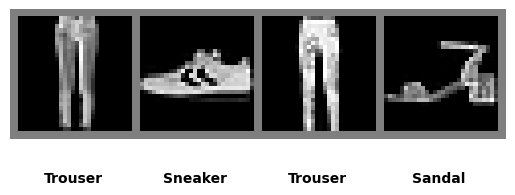

In [131]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore')

# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the Fashion-MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

# Define the classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Function to show images with centered labels
def imshow(img, labels):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
    # Calculate the width of each image in the grid
    img_width = npimg.shape[2] // len(labels)
    
    for i, label in enumerate(labels):
        # Set the position for each label
        plt.text(x=(i * img_width) + img_width / 2, y=npimg.shape[1] + 10, s=classes[label],
                 ha='center', fontsize=10, color='black', weight='bold')
    
    plt.axis('off')
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images with centered labels
imshow(torchvision.utils.make_grid(images), labels)


In [133]:
import torch.nn as nn
import torch.nn.functional as F

# Define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 600)
        self.fc2 = nn.Linear(600, 120)
        self.fc3 = nn.Linear(120, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # flatten image input
        x = F.relu(self.fc1(self.dropout(x)))
        x = F.relu(self.fc2(self.dropout(x)))
        x = self.fc3(x)
        return x

net = Net().to(device)


#### Write down the Code Explanations:
- Data Loading and Preprocessing: The Fashion-MNIST dataset is loaded and transformed into tensor format, normalized to have mean 0.5 and standard deviation 0.5, and then batched for training and testing using DataLoader. The imshow function displays the images with labels centered below each item.
- CNN Architecture: A simple CNN with two convolutional layers (conv1 and conv2), max-pooling, fully connected layers (fc1, fc2, fc3), and dropout regularization is defined. The model uses ReLU activation and the network is moved to the GPU if available.

In [135]:
import torch.optim as optim
import warnings 

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Lists for saving training and validation history
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Number of epochs
num_epochs = 5  # Reduced for quicker training

# Reduce the dataset size for quicker training (use a fraction of the dataset)
subset_indices_train = torch.utils.data.SubsetRandomSampler(range(10000))  # 10,000 random samples for training
subset_indices_test = torch.utils.data.SubsetRandomSampler(range(2000))  # 2,000 random samples for testing

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=False, num_workers=2, sampler=subset_indices_train)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2, sampler=subset_indices_test)

for epoch in range(num_epochs):
    # Training
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_losses.append(running_loss / len(trainloader))
    train_accuracies.append(100 * correct / total)

    # Validation
    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(testloader))
    val_accuracies.append(100 * correct / total)

    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.3f}, Train Accuracy: {train_accuracies[-1]:.2f}, Val Loss: {val_losses[-1]:.3f}, Val Accuracy: {val_accuracies[-1]:.2f}')


Epoch 1, Train Loss: 0.758, Train Accuracy: 71.28, Val Loss: 0.539, Val Accuracy: 81.00
Epoch 2, Train Loss: 0.465, Train Accuracy: 82.75, Val Loss: 0.418, Val Accuracy: 85.00
Epoch 3, Train Loss: 0.387, Train Accuracy: 85.75, Val Loss: 0.357, Val Accuracy: 88.00
Epoch 4, Train Loss: 0.341, Train Accuracy: 87.32, Val Loss: 0.353, Val Accuracy: 87.45
Epoch 5, Train Loss: 0.309, Train Accuracy: 88.71, Val Loss: 0.328, Val Accuracy: 89.15


#### Write down the Code Explanations:
- Model Training and Validation Loop: The training loop runs for 5 epochs, where in each epoch, the model is trained on a subset of 10,000 samples, and the validation is performed on a subset of 2,000 samples. The training and validation losses and accuracies are computed and stored for each epoch. The optimizer used is Adam with a learning rate of 0.001, and the loss function is CrossEntropyLoss.
- Performance Tracking: During training, the model's accuracy and loss for both the training and validation sets are tracked and printed at the end of each epoch. The model improves over epochs, with training accuracy increasing and validation accuracy also improving (from 71.28% to 89.15%).

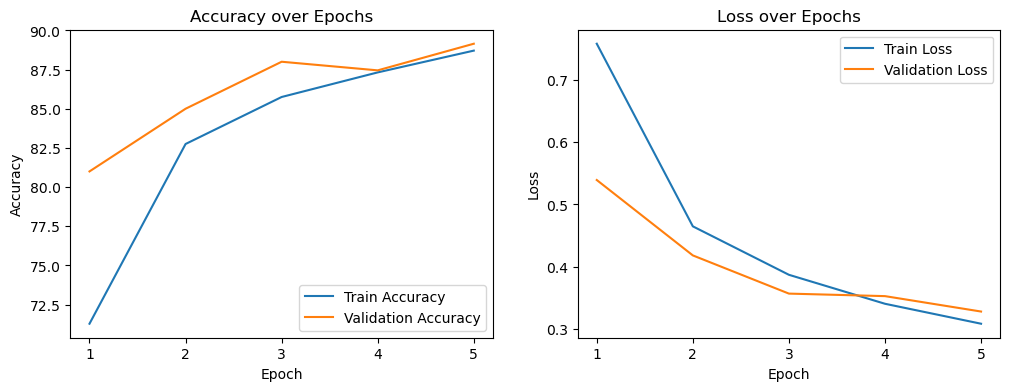

In [136]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 4))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(np.arange(1, len(train_accuracies) + 1, step=1))  # Set x-axis ticks to integer values

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.xticks(np.arange(1, len(train_losses) + 1, step=1))  # Set x-axis ticks to integer values

plt.show()


#### Write down the explanations and interpretations:
- The accuracy plot shows consistent improvement in both training and validation accuracy, with the model reaching 89.15% validation accuracy by the 5th epoch, indicating good learning and generalization.
- The loss plot shows a steady decline in both training and validation loss, with a smaller gap between training and validation loss by the final epoch, suggesting reduced overfitting and effective model optimization.

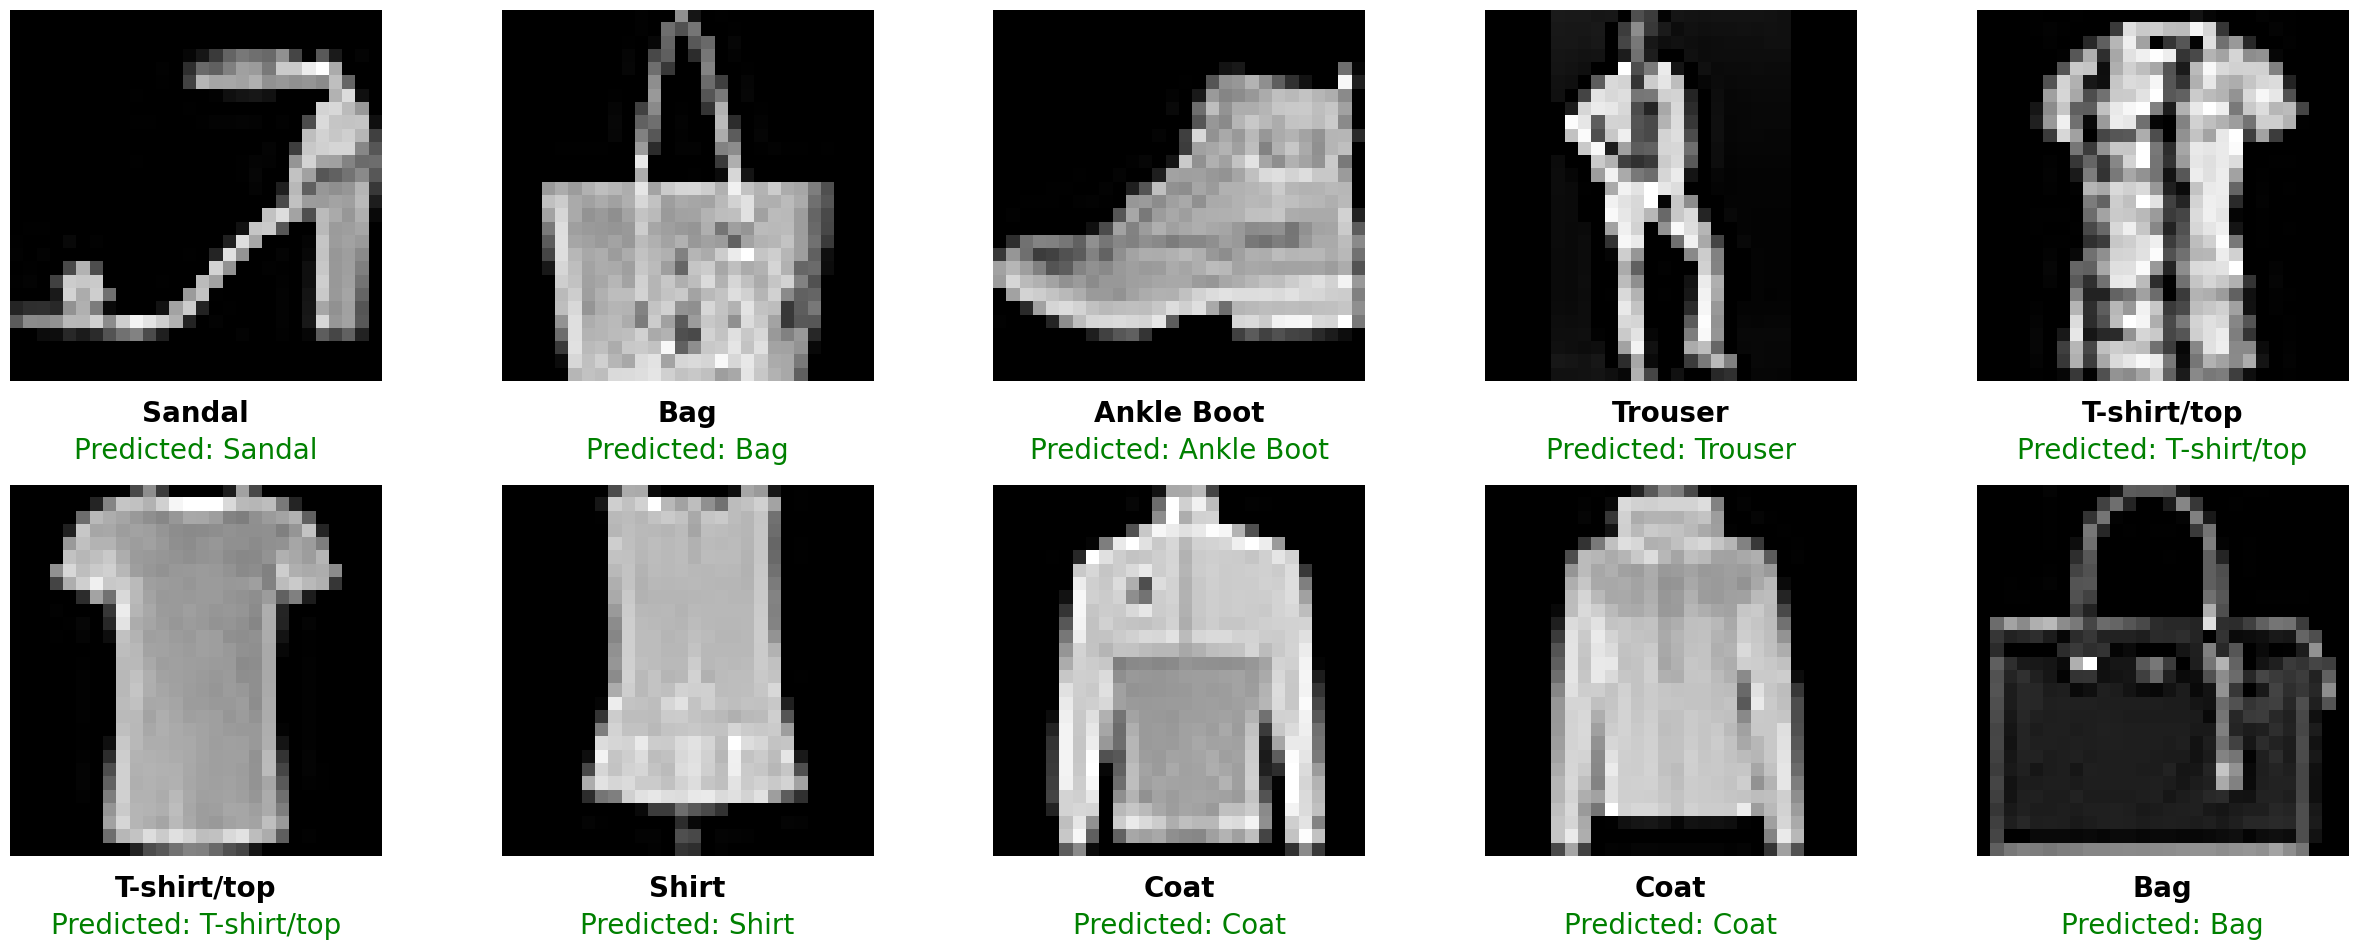

In [139]:
import warnings 

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

# Updated imshow function for displaying grayscale images
def imshow(img):
    # img is a torch tensor, so we need to change the order of dimensions to (HxWxC)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')

# Function to visualize images and compare true labels with model predictions
def visualize_model_performance(net, testloader, classes, device, num_images=10):
    net.eval()  # Set the model to evaluation mode
    images_so_far = 0
    fig = plt.figure(figsize=(25, 10))  # Adjust the figure size as needed

    with torch.no_grad():
        for i, data in enumerate(testloader):
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net(inputs)
            _, predictions = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//5, 5, images_so_far)
                ax.axis('off')
                
                # Add a border around the images
                for spine in ax.spines.values():
                    spine.set_edgecolor('black')
                    spine.set_linewidth(2)

                imshow(inputs.cpu().data[j])

                # Set the title for the true label
                true_label = f'{classes[labels[j]]}'
                pred_label = f'Predicted: {classes[predictions[j]]}'
                pred_color = 'red' if predictions[j] != labels[j] else 'green'
                
                # Position the text below the image and increase the font size
                plt.text(0.5, -0.05, 
                         true_label, 
                         ha='center', 
                         transform=ax.transAxes, 
                         fontsize=20, 
                         verticalalignment='top', 
                         weight='bold')
                plt.text(0.5, -0.15, 
                         pred_label, 
                         ha='center', 
                         color=pred_color, 
                         transform=ax.transAxes, 
                         fontsize=20, 
                         verticalalignment='top')

                if images_so_far == num_images:
                    plt.tight_layout(pad=3.0)
                    return

# Call the function to visualize the model performance
visualize_model_performance(net, testloader, classes, device, num_images=10)


#### Write down the explanations and interpretations:
- The function visualizes the model's performance by comparing the true labels with the predicted ones for a subset of test images, using green for correct predictions and red for incorrect ones, allowing easy identification of misclassifications.
- The images are displayed with proper spacing and a black border, and the labels are placed below each image, making the results clear and visually organized, allowing evaluation of the model's accuracy for individual test samples.

---

#### Revised Date: August 19, 2024